In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as st

t_data = np.loadtxt('timedata.dat')
x_data = np.loadtxt('data.dat')


x_temp = np.loadtxt('true.dat')
x_true = x_temp.reshape(5,3650)
t = x_true[4,:]

skip = 50


0.5336456889557727
0.12218453699489806
0.0422161225510346
0.00275311270436654
0.08946895963001501
0.002602520824367302
0.0005453562095973614
0.00012383795122979715


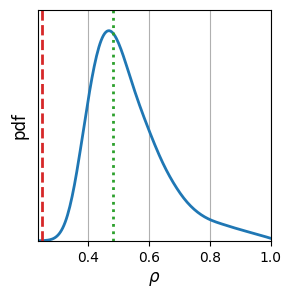

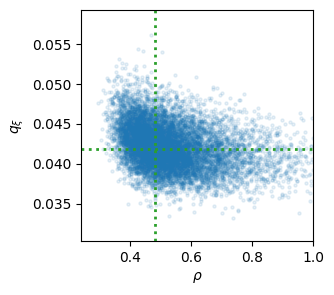

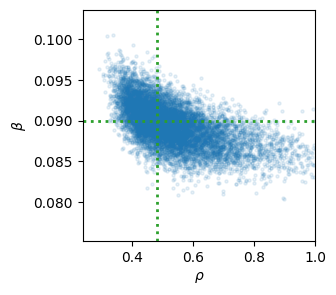

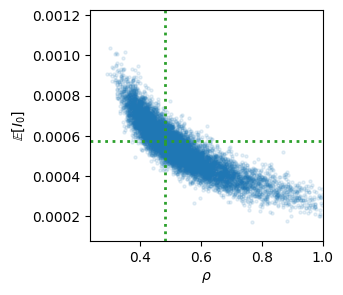

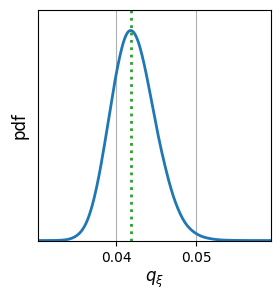

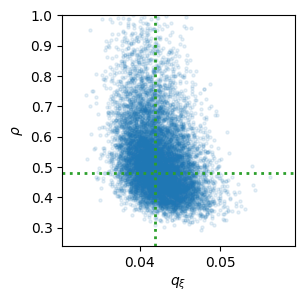

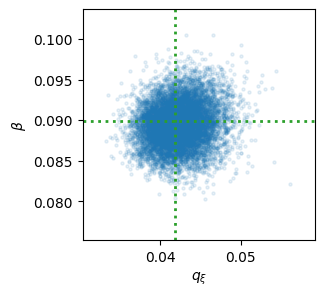

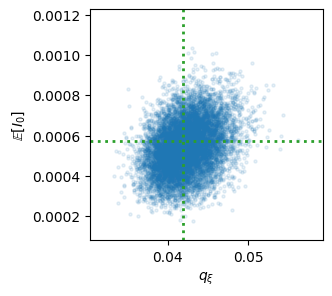

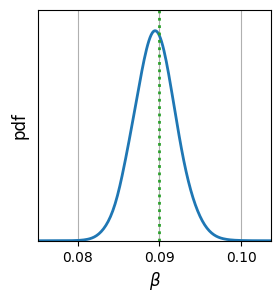

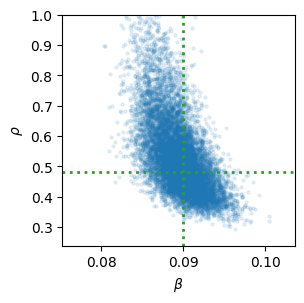

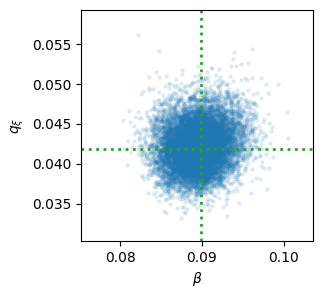

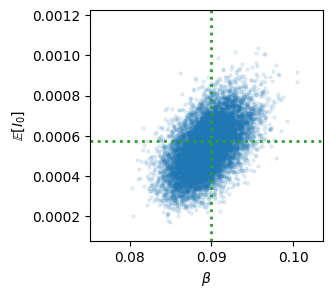

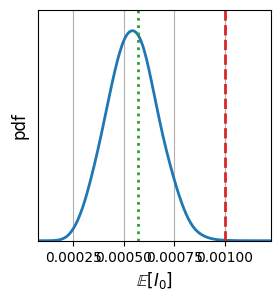

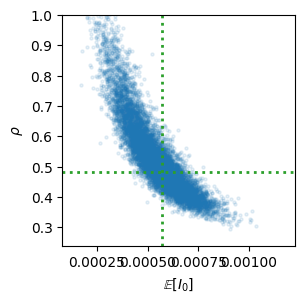

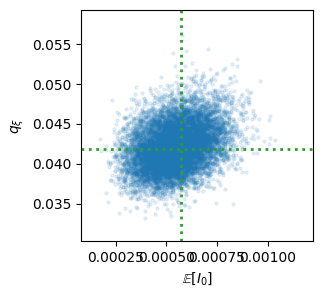

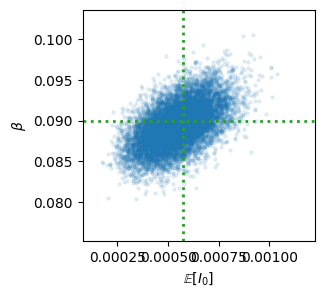

In [3]:
## Model 1

samples = np.loadtxt('chains/Model1-posterior.dat')
priors = np.loadtxt('chains/Model1-prior.dat')
maps = np.loadtxt('chains/Model1-map.dat')
label_2 = [r'$\rho$',r'$q_\xi$',r'$\beta$','$\mathbb{E}[I_0]$']
true = [0.25,0.005,0.12,0.001]
Npar = len(samples[:,0])


# from scipy.optimize import minimize
# kde = st.gaussian_kde(samples)
# def kde_fun(x):
#   return -kde(x)
# res = minimize(kde_fun,param_true, method='nelder-mead',options={'xatol': 1e-8, 'disp': True})
# print(res.x)
# maps = res.x
# #np.savetxt('Case01Model2-map.dat')

for ii in range(len(samples[:,0])):
  xmin,xmax = np.min(samples[ii,:]), np.max(samples[ii,:])
  # if param_true[ii] < xmin:
  #   xmin = param_true[ii]
  # elif  param_true[ii] > xmax:
  #   xmax = param_true[ii]

  print(np.mean(samples[ii,:]),np.std(samples[ii,:]),maps[ii])

  xmean = (xmin + xmax)/2
  xrang = (xmax - xmin)
  x_low = np.max([xmean-0.55*xrang,0])
  x_up = np.min([xmean+0.55*xrang,1])

  f, ax = plt.subplots(1, figsize=(3,3))
  Xpdf = st.gaussian_kde(samples[ii,:],bw_method = 0.2)
  # print(Xpdf.silverman_factor())
  # Xgrd = np.linspace(np.min(samples[ii,:]),np.max(samples[ii,:]))
  Xgrd = np.linspace(x_low,x_up,201)
  pdfmax = max(Xpdf(Xgrd))
  plt.plot(Xgrd,Xpdf(Xgrd),color='tab:blue',linewidth=2)
  # plt.hist(samples[ii,:],bins=50,density=True,alpha=0.25)
  if ii != 2:
    plt.plot([true[ii],true[ii]],[0,1.1*pdfmax],c='tab:red',linewidth=2,linestyle='--')
  plt.plot([maps[ii],maps[ii]],[0,1.1*pdfmax],c='tab:green',linewidth=2,linestyle=':')
  # plt.hist(samples[ii,:], bins=50, density=True,alpha=0.5)
  # plt.hist(samples[ii,:],density=True,bins=50,alpha=0.5)
  # plt.hist(priors[ii,:],density=True,bins=50,alpha=0.5)
  myYlim = [0.0, 1.1*pdfmax]
  plt.ylabel('pdf', fontsize=12)
  plt.xlabel(label_2[ii], fontsize=12)
  plt.ylim(myYlim)
  plt.xlim([x_low,x_up])
  plt.yticks([])
  plt.grid(True)
  # plt.savefig('figures/m1_mpdf_'+ str(ii)+'.pdf',bbox_inches='tight')
  # plt.close()

  for jj in range(Npar):
   if ii != jj:
      ymin,ymax = np.min(samples[jj,:]), np.max(samples[jj,:])
      ymean = (ymin + ymax)/2
      yrang = (ymax - ymin)
      y_low = np.max([ymean-0.55*yrang,0])
      y_up = np.min([ymean+0.55*yrang,1])
      
      f, ax = plt.subplots(1, figsize=(3,3))
      plt.scatter(samples[ii,::skip],samples[jj,::skip],alpha=0.1,s=5)
      plt.plot([x_low,x_up],[maps[jj],maps[jj]],c='tab:green',linewidth=2,linestyle=':')
      plt.plot([maps[ii],maps[ii]],[y_low,y_up],c='tab:green',linewidth=2,linestyle=':')
      plt.xlim([x_low,x_up])
      plt.ylim([y_low,y_up])
      plt.xlabel(label_2[ii])
      plt.ylabel(label_2[jj])
      # plt.savefig('figures/m1_jpdf_'+ str(ii)+str(jj)+'.pdf',bbox_inches='tight')
      # plt.close()

Optimization terminated successfully.
         Current function value: -473309.736378
         Iterations: 90
         Function evaluations: 166
[9.58476063e-01 1.42237282e-01 2.74140349e-04]
0.8277719226835422
0.12110285022036092
0.1426398309230806
0.028224372701318858
0.0003194224112221739
6.825130125638328e-05


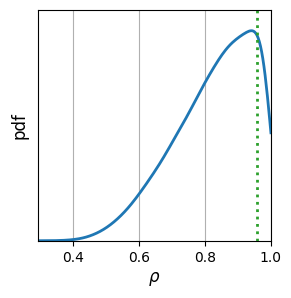

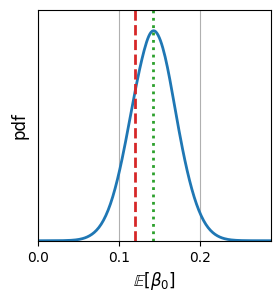

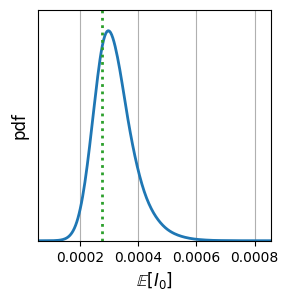

In [81]:
## Model 2

samples = np.loadtxt('chains/Model2-posterior.dat')
priors = np.loadtxt('chains/Model2-prior.dat')
maps = np.loadtxt('chains/Model2-map.dat')
label_2 = [r'$\rho$',r'$\mathbb{E}[\beta_0]$','$\mathbb{E}[I_0]$']
true = [0.25,0.12,0.001]
Npar = len(samples[:,0])

# from scipy.optimize import minimize
# kde = st.gaussian_kde(samples)
# def kde_fun(x):
#   return -kde(x)
# res = minimize(kde_fun,maps, method='nelder-mead',options={'xatol': 1e-8, 'disp': True})
# print(res.x)
# maps = res.x
# #np.savetxt('Case01Model2-map.dat')

for ii in range(len(samples[:,0])):
  xmin,xmax = np.min(samples[ii,:]), np.max(samples[ii,:])
  # if param_true[ii] < xmin:
  #   xmin = param_true[ii]
  # elif  param_true[ii] > xmax:
  #   xmax = param_true[ii]

  print(np.mean(samples[ii,:]),np.std(samples[ii,:]),maps[ii])

  xmean = (xmin + xmax)/2
  xrang = (xmax - xmin)
  x_low = np.max([xmean-0.55*xrang,0])
  x_up = np.min([xmean+0.55*xrang,1])

  f, ax = plt.subplots(1, figsize=(3,3))
  Xpdf = st.gaussian_kde(samples[ii,:],bw_method = 0.2)
  # print(Xpdf.silverman_factor())
  # Xgrd = np.linspace(np.min(samples[ii,:]),np.max(samples[ii,:]))
  Xgrd = np.linspace(x_low,x_up,201)
  pdfmax = max(Xpdf(Xgrd))
  plt.plot(Xgrd,Xpdf(Xgrd),color='tab:blue',linewidth=2)
  # plt.hist(samples[ii,:],bins=50,density=True,alpha=0.25)
  plt.plot([true[ii],true[ii]],[0,1.1*pdfmax],c='tab:red',linewidth=2,linestyle='--')
  plt.plot([maps[ii],maps[ii]],[0,1.1*pdfmax],c='tab:green',linewidth=2,linestyle=':')
  # plt.hist(samples[ii,:], bins=50, density=True,alpha=0.5)
  # plt.hist(samples[ii,:],density=True,bins=50,alpha=0.5)
  # plt.hist(priors[ii,:],density=True,bins=50,alpha=0.5)
  myYlim = [0.0, 1.1*pdfmax]
  plt.ylabel('pdf', fontsize=12)
  plt.xlabel(label_2[ii], fontsize=12)
  plt.ylim(myYlim)
  plt.xlim([x_low,x_up])
  plt.yticks([])
  plt.grid(True)
  # plt.savefig('figures/m2_mpdf_'+ str(ii)+'.pdf',bbox_inches='tight')
  # plt.close()

  for jj in range(Npar):
   if ii != jj:
      ymin,ymax = np.min(samples[jj,:]), np.max(samples[jj,:])
      ymean = (ymin + ymax)/2
      yrang = (ymax - ymin)
      y_low = np.max([ymean-0.55*yrang,0])
      y_up = np.min([ymean+0.55*yrang,1])

      f, ax = plt.subplots(1, figsize=(3,3))
      plt.scatter(samples[ii,::skip],samples[jj,::skip],alpha=0.1,s=5)
      plt.plot([x_low,x_up],[maps[jj],maps[jj]],c='tab:green',linewidth=2,linestyle=':')
      plt.plot([maps[ii],maps[ii]],[y_low,y_up],c='tab:green',linewidth=2,linestyle=':')
      plt.xlim([x_low,x_up])
      plt.ylim([y_low,y_up])
      plt.xlabel(label_2[ii], fontsize=12)
      plt.ylabel(label_2[jj], fontsize=12)
      # plt.savefig('figures/m2_jpdf_'+ str(ii)+str(jj)+'.pdf',bbox_inches='tight')
      # plt.close()

0.18731025449600333
0.026360054105505834
0.12559095588317937
0.03701436226840724
0.001390367095166249
0.00018044524364596283


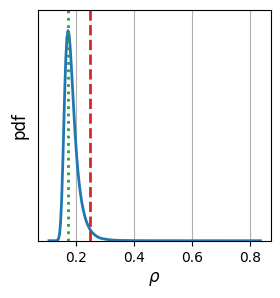

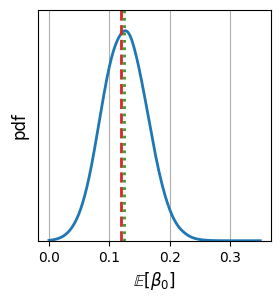

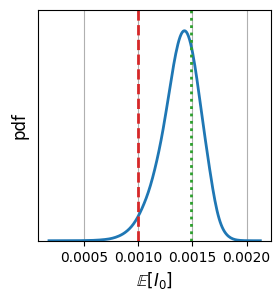

In [82]:
## Model 3

samples = np.loadtxt('chains/Model3-posterior.dat')
priors = np.loadtxt('chains/Model3-prior.dat')
maps = np.loadtxt('chains/Model3-map.dat')
true = [0.25,0.12,0.001]
label_2 = [r'$\rho$',r'$\mathbb{E}[\beta_0]$','$\mathbb{E}[I_0]$']
Npar = len(samples[:,0])

# from scipy.optimize import minimize
# kde = st.gaussian_kde(samples)
# def kde_fun(x):
#   return -kde(x)
# res = minimize(kde_fun,param_true, method='nelder-mead',options={'xatol': 1e-8, 'disp': True})
# print(res.x)
# maps = res.x
# #np.savetxt('Case01Model2-map.dat')

for ii in range(len(samples[:,0])):
  xmin,xmax = np.min(samples[ii,:]), np.max(samples[ii,:])
  # if param_true[ii] < xmin:
  #   xmin = param_true[ii]
  # elif  param_true[ii] > xmax:
  #   xmax = param_true[ii]

  print(np.mean(samples[ii,:]),np.std(samples[ii,:]),maps[ii])

  xmean = (xmin + xmax)/2
  xrang = (xmax - xmin)
  x_low = np.max([xmean-0.55*xrang,0])
  x_up = np.min([xmean+0.55*xrang,1])

  f, ax = plt.subplots(1, figsize=(3,3))
  Xpdf = st.gaussian_kde(samples[ii,:],bw_method = 0.2)
  # print(Xpdf.silverman_factor())
  # Xgrd = np.linspace(np.min(samples[ii,:]),np.max(samples[ii,:]))
  Xgrd = np.linspace(x_low,x_up,201)
  pdfmax = max(Xpdf(Xgrd))
  plt.plot(Xgrd,Xpdf(Xgrd),color='tab:blue',linewidth=2)
  # plt.hist(samples[ii,:],bins=50,density=True,alpha=0.25)
  plt.plot([true[ii],true[ii]],[0,1.1*pdfmax],c='tab:red',linewidth=2,linestyle='--')
  plt.plot([maps[ii],maps[ii]],[0,1.1*pdfmax],c='tab:green',linewidth=2,linestyle=':')
  # plt.hist(samples[ii,:], bins=50, density=True,alpha=0.5)
  # plt.hist(samples[ii,:],density=True,bins=50,alpha=0.5)
  # plt.hist(priors[ii,:],density=True,bins=50,alpha=0.5)
  myYlim = [0.0, 1.1*pdfmax]
  plt.ylabel('pdf', fontsize=12)
  plt.xlabel(label_2[ii], fontsize=12)
  plt.ylim(myYlim)
  # plt.xlim([x_low,x_up])
  plt.yticks([])
  plt.grid(True)
  plt.savefig('figures/m3_mpdf_'+ str(ii)+'.pdf',bbox_inches='tight')
  # plt.close()

  for jj in range(Npar):
   if ii != jj:
      ymin,ymax = np.min(samples[jj,:]), np.max(samples[jj,:])
      ymean = (ymin + ymax)/2
      yrang = (ymax - ymin)
      y_low = np.max([ymean-0.55*yrang,0])
      y_up = np.min([ymean+0.55*yrang,1])

      f, ax = plt.subplots(1, figsize=(3,3))
      plt.scatter(samples[ii,::skip],samples[jj,::skip],alpha=0.1,s=5)
      plt.plot([x_low,x_up],[maps[jj],maps[jj]],c='tab:green',linewidth=2,linestyle=':')
      plt.plot([maps[ii],maps[ii]],[y_low,y_up],c='tab:green',linewidth=2,linestyle=':')
      plt.xlim([x_low,x_up])
      plt.ylim([y_low,y_up])
      plt.xlabel(label_2[ii], fontsize=12)
      plt.ylabel(label_2[jj], fontsize=12)
      plt.savefig('figures/m3_jpdf_'+ str(ii)+str(jj)+'.pdf',bbox_inches='tight')
      plt.close()

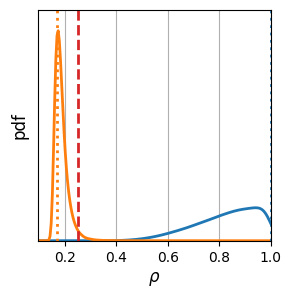

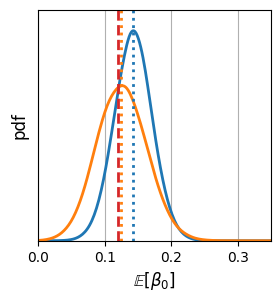

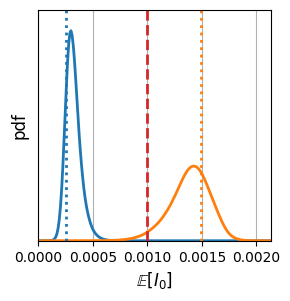

In [83]:
## Model 2 and 3
 
samples2 = np.loadtxt('chains/Model2-posterior.dat')
maps2 = np.loadtxt('chains/Model2-map.dat')

samples3 = np.loadtxt('chains/Model3-posterior.dat')
maps3 = np.loadtxt('chains/Model3-map.dat')

label_2 = [r'$\rho$',r'$\mathbb{E}[\beta_0]$','$\mathbb{E}[I_0]$']
true = [0.25,0.12,0.001]
Npar = len(samples[:,0])


for ii in range(len(samples2[:,0])):
  xmin,xmax = np.min([samples2[ii,:],samples3[ii,:]]), np.max([samples2[ii,:],samples3[ii,:]])
  xmean = (xmin + xmax)/2
  xrang = (xmax - xmin)
  x_low = np.max([xmean-0.55*xrang,0])
  x_up = np.min([xmean+0.55*xrang,1])

  f, ax = plt.subplots(1, figsize=(3,3))
  Xpdf2 = st.gaussian_kde(samples2[ii,:],bw_method = 0.2)
  Xpdf3 = st.gaussian_kde(samples3[ii,:],bw_method = 0.2)
  # print(Xpdf.silverman_factor())
  # Xgrd = np.linspace(np.min(samples[ii,:]),np.max(samples[ii,:]))
  Xgrd = np.linspace(x_low,x_up,201)
  pdfmax = np.max([Xpdf2(Xgrd),Xpdf3(Xgrd)])
  plt.plot(Xgrd,Xpdf2(Xgrd),color='tab:blue',linewidth=2)
  plt.plot(Xgrd,Xpdf3(Xgrd),color='tab:orange',linewidth=2)
  # plt.hist(samples[ii,:],bins=50,density=True,alpha=0.25)
  plt.plot([true[ii],true[ii]],[0,1.1*pdfmax],c='tab:red',linewidth=2,linestyle='--')
  plt.plot([maps2[ii],maps2[ii]],[0,1.1*pdfmax],c='tab:blue',linewidth=2,linestyle=':')
  plt.plot([maps3[ii],maps3[ii]],[0,1.1*pdfmax],c='tab:orange',linewidth=2,linestyle=':')
  # plt.hist(samples[ii,:], bins=50, density=True,alpha=0.5)
  # plt.hist(samples[ii,:],density=True,bins=50,alpha=0.5)
  # plt.hist(priors[ii,:],density=True,bins=50,alpha=0.5)
  myYlim = [0.0, 1.1*pdfmax]
  plt.ylabel('pdf', fontsize=12)
  plt.xlabel(label_2[ii], fontsize=12)
  plt.ylim(myYlim)
  plt.xlim([x_low,x_up])
  plt.yticks([])
  plt.grid(True)
  # plt.savefig('figures/m23_mpdf_'+ str(ii)+'.pdf',bbox_inches='tight')
  # plt.close()

(4, 500000)
Optimization terminated successfully.
         Current function value: -600205395.791533
         Iterations: 155
         Function evaluations: 267
0.24796880066487068 0.06565909027471058 0.2267290466756317
0.0049480702647843895 0.0006384888297865173 0.004819177877485396
0.1331691318659157 0.032587769082853824 0.13735463527810865
0.0010691921867735912 0.0002100612460272144 0.0011112535005727486


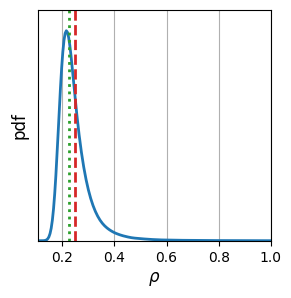

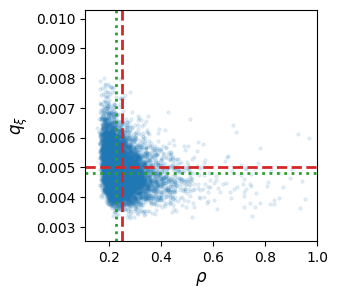

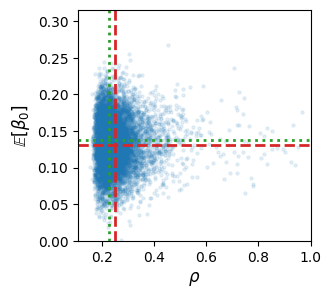

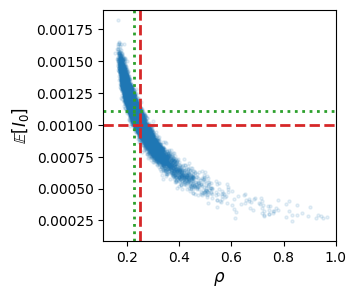

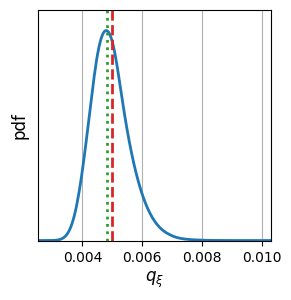

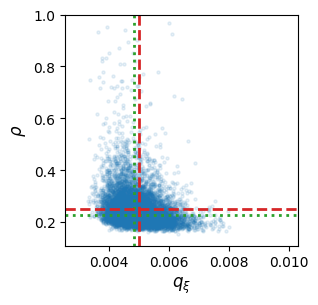

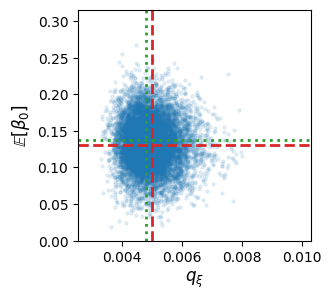

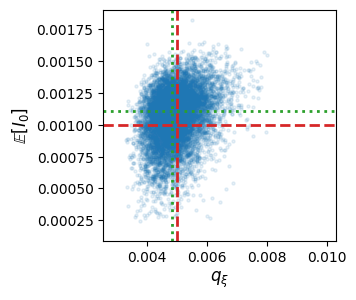

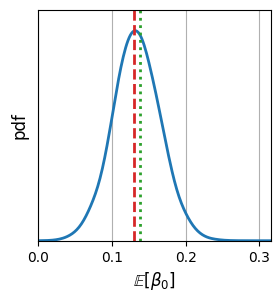

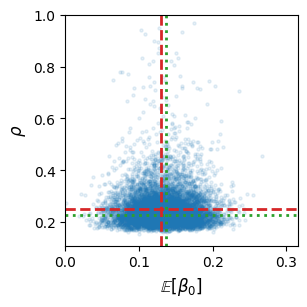

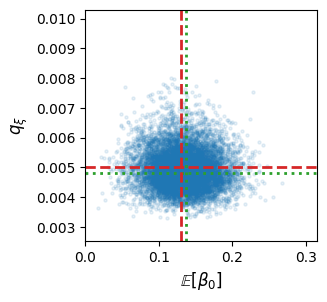

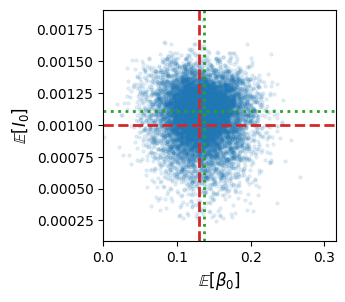

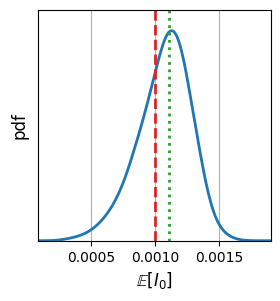

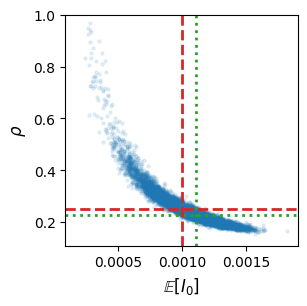

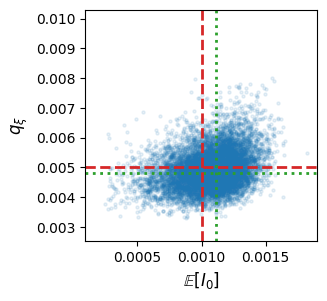

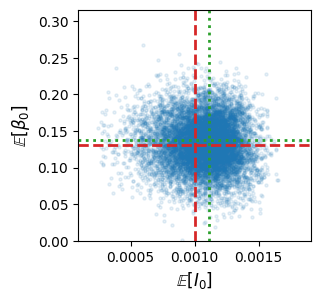

In [84]:
## Model 4

samples = np.loadtxt('chains/Model4-posterior.dat')
print(samples.shape)
priors = np.loadtxt('chains/Model4-prior.dat')
maps = np.loadtxt('chains/Model4-map.dat')
label_2 = [r'$\rho$',r'$q_\xi$',r'$\mathbb{E}[\beta_0]$','$\mathbb{E}[I_0]$']
true = [0.25,0.005,0.1303,0.001]
Npar = len(samples[:,0])

# from scipy.optimize import minimize
# kde = st.gaussian_kde(samples)
# def kde_fun(x):
#   return -kde(x)
# res = minimize(kde_fun,[0.25,0.005,0.12,0.001], method='nelder-mead',options={'xatol': 1e-8, 'disp': True})
# # print(res.x)
# maps = res.x
# np.savetxt('chains/Model4-map.dat',maps)

for ii in range(len(samples[:,0])):
  xmin,xmax = np.min(samples[ii,:]), np.max(samples[ii,:])
  # if param_true[ii] < xmin:
  #   xmin = param_true[ii]
  # elif  param_true[ii] > xmax:
  #   xmax = param_true[ii]

  print(np.mean(samples[ii,:]),np.std(samples[ii,:]),maps[ii])

  xmean = (xmin + xmax)/2
  xrang = (xmax - xmin)
  x_low = np.max([xmean-0.55*xrang,0])
  x_up = np.min([xmean+0.55*xrang,1])

  f, ax = plt.subplots(1, figsize=(3,3))
  Xpdf = st.gaussian_kde(samples[ii,:],bw_method = 0.2)
  # print(Xpdf.silverman_factor())
  # Xgrd = np.linspace(np.min(samples[ii,:]),np.max(samples[ii,:]))
  Xgrd = np.linspace(x_low,x_up,201)
  pdfmax = max(Xpdf(Xgrd))
  plt.plot(Xgrd,Xpdf(Xgrd),color='tab:blue',linewidth=2)
  # plt.hist(samples[ii,:],bins=50,density=True,alpha=0.25)
  plt.plot([true[ii],true[ii]],[0,1.1*pdfmax],c='tab:red',linewidth=2,linestyle='--')
  plt.plot([maps[ii],maps[ii]],[0,1.1*pdfmax],c='tab:green',linewidth=2,linestyle=':')
  # plt.hist(samples[ii,:], bins=50, density=True,alpha=0.5)
  # plt.hist(samples[ii,:],density=True,bins=50,alpha=0.5)
  # plt.hist(priors[ii,:],density=True,bins=50,alpha=0.5)
  myYlim = [0.0, 1.1*pdfmax]
  plt.ylabel('pdf', fontsize=12)
  plt.xlabel(label_2[ii], fontsize=12)
  plt.ylim(myYlim)
  plt.xlim([x_low,x_up])
  plt.yticks([])
  plt.grid(True)
  # plt.savefig('figures/m4_mpdf_'+ str(ii)+'.pdf',bbox_inches='tight')
  # plt.close()

  for jj in range(Npar):
   if ii != jj:
      ymin,ymax = np.min(samples[jj,:]), np.max(samples[jj,:])
      ymean = (ymin + ymax)/2
      yrang = (ymax - ymin)
      y_low = np.max([ymean-0.55*yrang,0])
      y_up = np.min([ymean+0.55*yrang,1])

      f, ax = plt.subplots(1, figsize=(3,3))
      plt.scatter(samples[ii,::skip],samples[jj,::skip],alpha=0.1,s=5)
      plt.plot([x_low,x_up],[maps[jj],maps[jj]],c='tab:green',linewidth=2,linestyle=':')
      plt.plot([maps[ii],maps[ii]],[y_low,y_up],c='tab:green',linewidth=2,linestyle=':')
      plt.plot([x_low,x_up],[true[jj],true[jj]],c='tab:red',linewidth=2,linestyle='--')
      plt.plot([true[ii],true[ii]],[y_low,y_up],c='tab:red',linewidth=2,linestyle='--')
      plt.xlabel(label_2[ii], fontsize=12)
      plt.ylabel(label_2[jj], fontsize=12)
      plt.xlim([x_low,x_up])
      plt.ylim([y_low,y_up])
      # plt.savefig('figures/m4_jpdf_'+ str(ii)+str(jj)+'.pdf',bbox_inches='tight')
      # plt.close()

(4, 500000)
Optimization terminated successfully.
         Current function value: -600205395.791533
         Iterations: 155
         Function evaluations: 267


(9.019434926960893e-05, 0.001905211633937471)

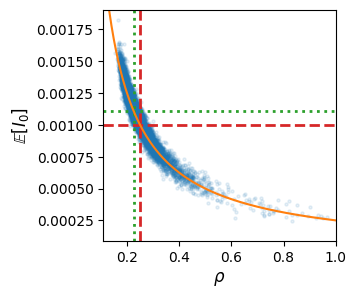

In [6]:
## Model 4

samples = np.loadtxt('chains/Model4-posterior.dat')
print(samples.shape)
# priors = np.loadtxt('chains/Model4-prior.dat')
# maps = np.loadtxt('chains/Model4-map.dat')
label_2 = [r'$\rho$',r'$q_\xi$',r'$\mathbb{E}[\beta_0]$','$\mathbb{E}[I_0]$']
true = [0.25,0.005,0.1303,0.001]
Npar = len(samples[:,0])

from scipy.optimize import minimize
kde = st.gaussian_kde(samples)
def kde_fun(x):
  return -kde(x)
res = minimize(kde_fun,[0.25,0.005,0.12,0.001], method='nelder-mead',options={'xatol': 1e-8, 'disp': True})
# print(res.x)
maps = res.x
np.savetxt('chains/Model4-map.dat',maps)

ii = 0
jj = 3
xmin,xmax = np.min(samples[ii,:]), np.max(samples[ii,:])
xmean = (xmin + xmax)/2
xrang = (xmax - xmin)
x_low = np.max([xmean-0.55*xrang,0])
x_up = np.min([xmean+0.55*xrang,1])
Xgrd = np.linspace(x_low,x_up,201)

ymin,ymax = np.min(samples[jj,:]), np.max(samples[jj,:])
ymean = (ymin + ymax)/2
yrang = (ymax - ymin)
y_low = np.max([ymean-0.55*yrang,0])
y_up = np.min([ymean+0.55*yrang,1])

f, ax = plt.subplots(1, figsize=(3,3))
plt.scatter(samples[ii,::skip],samples[jj,::skip],alpha=0.1,s=5)
plt.plot([x_low,x_up],[maps[jj],maps[jj]],c='tab:green',linewidth=2,linestyle=':')
plt.plot([maps[ii],maps[ii]],[y_low,y_up],c='tab:green',linewidth=2,linestyle=':')
plt.plot([x_low,x_up],[true[jj],true[jj]],c='tab:red',linewidth=2,linestyle='--')
plt.plot([true[ii],true[ii]],[y_low,y_up],c='tab:red',linewidth=2,linestyle='--')
plt.plot(Xgrd,0.00025/Xgrd,c='tab:orange')
plt.xlabel(label_2[ii], fontsize=12)
plt.ylabel(label_2[jj], fontsize=12)
plt.xlim([x_low,x_up])
plt.ylim([y_low,y_up])
# plt.savefig('figures/m4_jpdf_'+ str(ii)+str(jj)+'.pdf',bbox_inches='tight')
# plt.close()